---
## Krok 0: Import bibliotek

In [ ]:
# Importy systemowe
import os
import warnings
warnings.filterwarnings('ignore')

# Upewnij sie ze katalogi istnieja
os.makedirs("data", exist_ok=True)
os.makedirs("output", exist_ok=True)
os.makedirs("output/visualizations", exist_ok=True)

print("[OK] Katalogi przygotowane")

✅ Katalogi przygotowane


---
## Krok 1: Generowanie danych testowych (PCAP)

Generujemy realistyczny ruch sieciowy zawierajacy:
- Normalny ruch HTTP/HTTPS/DNS
- Scenariusze atakow (port scan, C2, ransomware, exfiltration)

In [ ]:
from simulate_traffic import create_demo_pcap_with_alerts, create_apt_scenario_pcap, create_normal_traffic_pcap

# Generowanie plikow PCAP
create_demo_pcap_with_alerts("data/demo_traffic.pcap")
create_normal_traffic_pcap("data/normal_traffic.pcap")
create_apt_scenario_pcap("data/apt_attack.pcap")

print("\n[OK] Pliki PCAP wygenerowane!")

INFO:simulate_traffic:Generowanie 50 pakietów normalnego ruchu HTTP...
INFO:simulate_traffic:Generowanie 60 pakietów normalnego ruchu HTTPS...
INFO:simulate_traffic:Generowanie 50 pakietów normalnego ruchu HTTP...
INFO:simulate_traffic:Generowanie 60 pakietów normalnego ruchu HTTPS...
INFO:simulate_traffic:Generowanie 40 pakietów normalnego ruchu DNS...
INFO:simulate_traffic:Generowanie 40 pakietów normalnego ruchu DNS...
INFO:simulate_traffic:Generowanie skanowania portów na 192.168.1.20...
INFO:simulate_traffic:Generowanie ruchu do podejrzanego portu 4444 (Metasploit)...
INFO:simulate_traffic:Generowanie ruchu Cobalt Strike beacon...
INFO:simulate_traffic:Generowanie skanowania portów na 192.168.1.20...
INFO:simulate_traffic:Generowanie ruchu do podejrzanego portu 4444 (Metasploit)...
INFO:simulate_traffic:Generowanie ruchu Cobalt Strike beacon...
INFO:simulate_traffic:Generowanie ruchu bocznego (lateral movement)...
INFO:simulate_traffic:Generowanie dużego transferu danych (eksfiltr


✅ Pliki PCAP wygenerowane!



---
## Krok 2: Analiza przeplywow sieciowych

Wczytujemy plik PCAP i ekstrahujemy przeplywy sieciowe (5-tuple).

In [ ]:
from flow_analyzer import FlowAnalyzer

# Wczytanie przeplywow
analyzer = FlowAnalyzer("data/demo_traffic.pcap")
flows = analyzer.load_flows()
stats = analyzer.get_flow_statistics()

# Wyswietlenie statystyk
print("=" * 50)
print("STATYSTYKI PRZEPLYWOW")
print("=" * 50)
print(f"Calkowita liczba przeplywow: {stats['total_flows']}")
print(f"Unikalne IP zrodlowe:        {stats['unique_src_ips']}")
print(f"Unikalne IP docelowe:        {stats['unique_dst_ips']}")
print(f"Calkowita liczba pakietow:   {stats['total_packets']:,}")
print(f"Calkowita liczba bajtow:     {stats['total_bytes']:,}")
print(f"Srednia pakietow/przeplyw:   {stats['avg_packets_per_flow']:.2f}")

INFO:flow_analyzer:Wczytywanie przepływów z pliku: data/demo_traffic.pcap
INFO:flow_analyzer:Wczytano 430 pakietów
INFO:flow_analyzer:Wczytano 430 pakietów
INFO:flow_analyzer:Utworzono 390 przepływów
INFO:flow_analyzer:Utworzono 390 przepływów


📈 STATYSTYKI PRZEPŁYWÓW
Całkowita liczba przepływów: 390
Unikalne IP źródłowe:        108
📈 STATYSTYKI PRZEPŁYWÓW
Całkowita liczba przepływów: 390
Unikalne IP źródłowe:        108
Unikalne IP docelowe:        40

Unikalne IP docelowe:        40
Całkowita liczba pakietów:   430
Całkowita liczba bajtów:     70,332
Średnia pakietów/przepływ:   1.10
Całkowita liczba pakietów:   430
Całkowita liczba bajtów:     70,332
Średnia pakietów/przepływ:   1.10


In [ ]:
# Podglad danych
print("\nPrzykladowe przeplywy:")
flows.head(10)


📋 Przykładowe przepływy:



,src_ip,dst_ip,src_port,dst_port,protocol,bidirectional_packets,bidirectional_bytes,src2dst_packets,src2dst_bytes,dst2src_packets,dst2src_bytes,bidirectional_duration_ms,src2dst_duration_ms,dst2src_duration_ms,application_name,application_category_name
0,192.168.1.114,52.94.236.248,52928,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
1,192.168.1.157,13.107.21.200,63414,80,6,1,108,1,108,0,0,0.000000,0.000000,0.000000,HTTP,Web
2,192.168.1.116,140.82.121.4,63041,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
3,192.168.1.157,52.94.236.248,58944,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
4,192.168.1.198,52.94.236.248,53066,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
5,192.168.1.103,8.8.8.8,58702,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
6,192.168.1.101,8.8.8.8,52876,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
7,192.168.1.15,8.8.8.8,60182,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
8,192.168.1.148,8.8.8.8,56495,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web
9,192.168.1.127,8.8.8.8,64726,80,6,1,105,1,105,0,0,0.000000,0.000000,0.000000,HTTP,Web


---
## Krok 3: Detekcja zagrozen

Uruchamiamy silnik detekcji z regulami:
- **Python rules**: Port scan, Large transfer, Suspicious ports, DNS tunneling
- **Sigma rules**: Format YAML zgodny ze standardem Sigma (10 regul MITRE ATT&CK)

In [22]:
from detection_rules.detection_rules import create_default_detection_engine
from detection_rules.sigma_handler import SigmaRuleEngine

# Inicjalizacja silnika detekcji Python
engine = create_default_detection_engine()

# Uruchomienie detekcji Python rules
alerts = engine.run_detection(flows)
alerts_df = engine.get_alerts_dataframe()

# Wczytanie i uruchomienie regul Sigma
sigma_engine = SigmaRuleEngine()
sigma_engine.load_rules_from_directory("detection_rules/sigma_rules")
sigma_alerts = sigma_engine.run_detection(flows)

# Polaczenie alertow
if sigma_alerts:
    import pandas as pd
    sigma_df = pd.DataFrame(sigma_alerts)
    if not alerts_df.empty:
        alerts_df = pd.concat([alerts_df, sigma_df], ignore_index=True)
    else:
        alerts_df = sigma_df

print("=" * 50)
print("WYNIKI DETEKCJI")
print("=" * 50)
print(f"Alerty Python rules: {len(alerts)}")
print(f"Alerty Sigma rules:  {len(sigma_alerts)}")
print(f"RAZEM:               {len(alerts_df)}")

if not alerts_df.empty and 'severity' in alerts_df.columns:
    print("\nRozklad wedlug severity:")
    print(alerts_df['severity'].value_counts().to_string())

INFO:detection_rules.detection_rules:Dodano regułę: Large Data Transfer
INFO:detection_rules.detection_rules:Dodano regułę: Port Scan Detection
INFO:detection_rules.detection_rules:Dodano regułę: Port Scan Detection
INFO:detection_rules.detection_rules:Dodano regułę: Suspicious Port Connection
INFO:detection_rules.detection_rules:Dodano regułę: DNS Tunneling Detection
INFO:detection_rules.detection_rules:Dodano regułę: Long Duration Connection
INFO:detection_rules.detection_rules:Uruchamianie detekcji z 5 regułami...
INFO:detection_rules.detection_rules:Dodano regułę: Suspicious Port Connection
INFO:detection_rules.detection_rules:Dodano regułę: DNS Tunneling Detection
INFO:detection_rules.detection_rules:Dodano regułę: Long Duration Connection
INFO:detection_rules.detection_rules:Uruchamianie detekcji z 5 regułami...
INFO:detection_rules.detection_rules:Wygenerowano 11 alertów
INFO:detection_rules.sigma_handler:Wczytano regułę Sigma: Cobalt Strike C2 Beacon Detection
INFO:detection_ru

WYNIKI DETEKCJI

WYNIKI DETEKCJI
Alerty Python rules: 11
Alerty Sigma rules:  10
RAZEM:               21

Rozklad wedlug severity:
medium      10
critical    10
high         1
Alerty Python rules: 11
Alerty Sigma rules:  10
RAZEM:               21

Rozklad wedlug severity:
medium      10
critical    10
high         1


In [ ]:
# Lista alertow
if not alerts_df.empty:
    print("\nLista wykrytych alertow:")
    display(alerts_df[['rule', 'severity', 'message']].head(20))
else:
    print("Brak alertow")


📋 Lista wykrytych alertów:



,rule,severity,message
0,Port Scan Detection,high,Możliwe skanowanie portów z 192.168.1.99: 30 r...
1,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
2,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
3,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
4,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
5,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
6,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
7,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
8,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...
9,Suspicious Port Connection,medium,Połączenie do podejrzanego portu: 192.168.1.75...


---
## Krok 4: Klasyfikacja Machine Learning

Trenujemy model ML do klasyfikacji przeplywow jako normalne/podejrzane.

In [ ]:
from models.ml_classifier import NetworkMLClassifier

# Inicjalizacja i trenowanie modelu
classifier = NetworkMLClassifier()
ml_metrics = classifier.train(flows, tune_hyperparameters=False)

print("=" * 50)
print("METRYKI MODELU ML")
print("=" * 50)
print(f"Accuracy:  {ml_metrics['accuracy']:.4f}  ({ml_metrics['accuracy']:.2%})")
print(f"Precision: {ml_metrics['precision']:.4f}")
print(f"Recall:    {ml_metrics['recall']:.4f}")
print(f"F1 Score:  {ml_metrics['f1_score']:.4f}")
print(f"\nFPR (False Positive Rate): {ml_metrics['fpr']:.4f}")
print(f"TPR (True Positive Rate):  {ml_metrics['tpr']:.4f}")

INFO:models.ml_classifier:Rozpoczęcie trenowania modelu ML...
INFO:models.ml_classifier:Model wytrenowany. Accuracy: 1.0000, F1: 1.0000
INFO:models.ml_classifier:Model wytrenowany. Accuracy: 1.0000, F1: 1.0000


🤖 METRYKI MODELU ML
Accuracy:  1.0000  (100.00%)
Precision: 1.0000

🤖 METRYKI MODELU ML
Accuracy:  1.0000  (100.00%)
Precision: 1.0000
Recall:    1.0000Recall:    1.0000
F1 Score:  1.0000

⚠️  FPR (False Positive Rate): 0.0000
F1 Score:  1.0000

⚠️  FPR (False Positive Rate): 0.0000
✅ TPR (True Positive Rate):  1.0000

✅ TPR (True Positive Rate):  1.0000


In [ ]:
# Macierz konfuzji
import numpy as np

cm = ml_metrics['confusion_matrix']
print("\nMacierz konfuzji:")
print(f"                  Predicted")
print(f"                  Normal  Suspicious")
print(f"Actual Normal     {cm[0][0]:5d}   {cm[0][1]:5d}")
print(f"       Suspicious {cm[1][0]:5d}   {cm[1][1]:5d}")


📊 Macierz konfuzji:
                  Predicted
                  Normal  Suspicious
Actual Normal       114       0
       Suspicious     0       3

                  Predicted
                  Normal  Suspicious
Actual Normal       114       0
       Suspicious     0       3


---
## Krok 5: Threat Intelligence Enrichment

Wzbogacamy przeplywy o dane geolokalizacyjne (kraj, miasto, ISP).

In [ ]:
from threat_intel import ThreatIntelligenceEnricher

# Inicjalizacja enrichera
enricher = ThreatIntelligenceEnricher(rate_limit_delay=0.3)

# Wzbogacenie danych (tylko publiczne IP docelowe)
print("Wzbogacanie danych o geolokalizacje...")
print("(To moze potrwac chwile ze wzgledu na limity API)\n")

enriched_flows = enricher.enrich_flows(
    flows, 
    enrich_src=False,  # Pomijamy prywatne IP zrodlowe
    enrich_dst=True    # Wzbogacamy publiczne IP docelowe
)

print("\n[OK] Wzbogacanie zakonczone!")

🌍 Wzbogacanie danych o geolokalizację...
(To może potrwać chwilę ze względu na limity API)


(To może potrwać chwilę ze względu na limity API)



INFO:threat_intel:Rozpoczęcie wzbogacania danych...
INFO:threat_intel:Wzbogacanie 18 unikalnych IP...
INFO:threat_intel:Wzbogacanie 18 unikalnych IP...
INFO:threat_intel:Przetworzono 10/18 IP...
INFO:threat_intel:Przetworzono 10/18 IP...
INFO:threat_intel:Wzbogacanie zakończone
INFO:threat_intel:Wzbogacanie zakończone



✅ Wzbogacanie zakończone!



In [ ]:
# Podglad wzbogaconych danych
geo_columns = ['dst_ip', 'dst_country', 'dst_city', 'dst_isp']
available_cols = [c for c in geo_columns if c in enriched_flows.columns]

if available_cols:
    print("\nPrzykladowe dane geolokalizacyjne:")
    display(enriched_flows[available_cols].dropna().drop_duplicates().head(10))
else:
    print("Brak danych geolokalizacyjnych (sprawdz polaczenie z API)")


🗺️ Przykładowe dane geolokalizacyjne:



,dst_ip,dst_country,dst_city,dst_isp
0,52.94.236.248,United States,Ashburn,"Amazon.com, Inc."
1,13.107.21.200,Canada,Montreal,Microsoft Corporation
2,140.82.121.4,Germany,Frankfurt am Main,"GitHub, Inc."
5,8.8.8.8,United States,Ashburn,Google LLC
50,204.79.197.200,Canada,Montreal,Microsoft Corporation
53,1.1.1.1,Hong Kong,Hong Kong,"Cloudflare, Inc"
55,1.0.0.1,Australia,South Brisbane,"Cloudflare, Inc"
60,54.239.28.85,United States,Ashburn,"Amazon.com, Inc."
66,140.82.121.3,Germany,Frankfurt am Main,"GitHub, Inc."
78,8.8.4.4,United States,Ashburn,Google LLC


---
## Krok 6: Wizualizacje

Generujemy wykresy i mape Threat Intelligence.

In [12]:
from visualizations import NetworkVisualizer
import matplotlib.pyplot as plt

# Inicjalizacja wizualizera
viz = NetworkVisualizer(output_dir="./output/visualizations")

# Słownik na ścieżki do wizualizacji
viz_paths = {}

INFO:visualizations:Wykres zapisany: ./output/visualizations\protocol_distribution.png


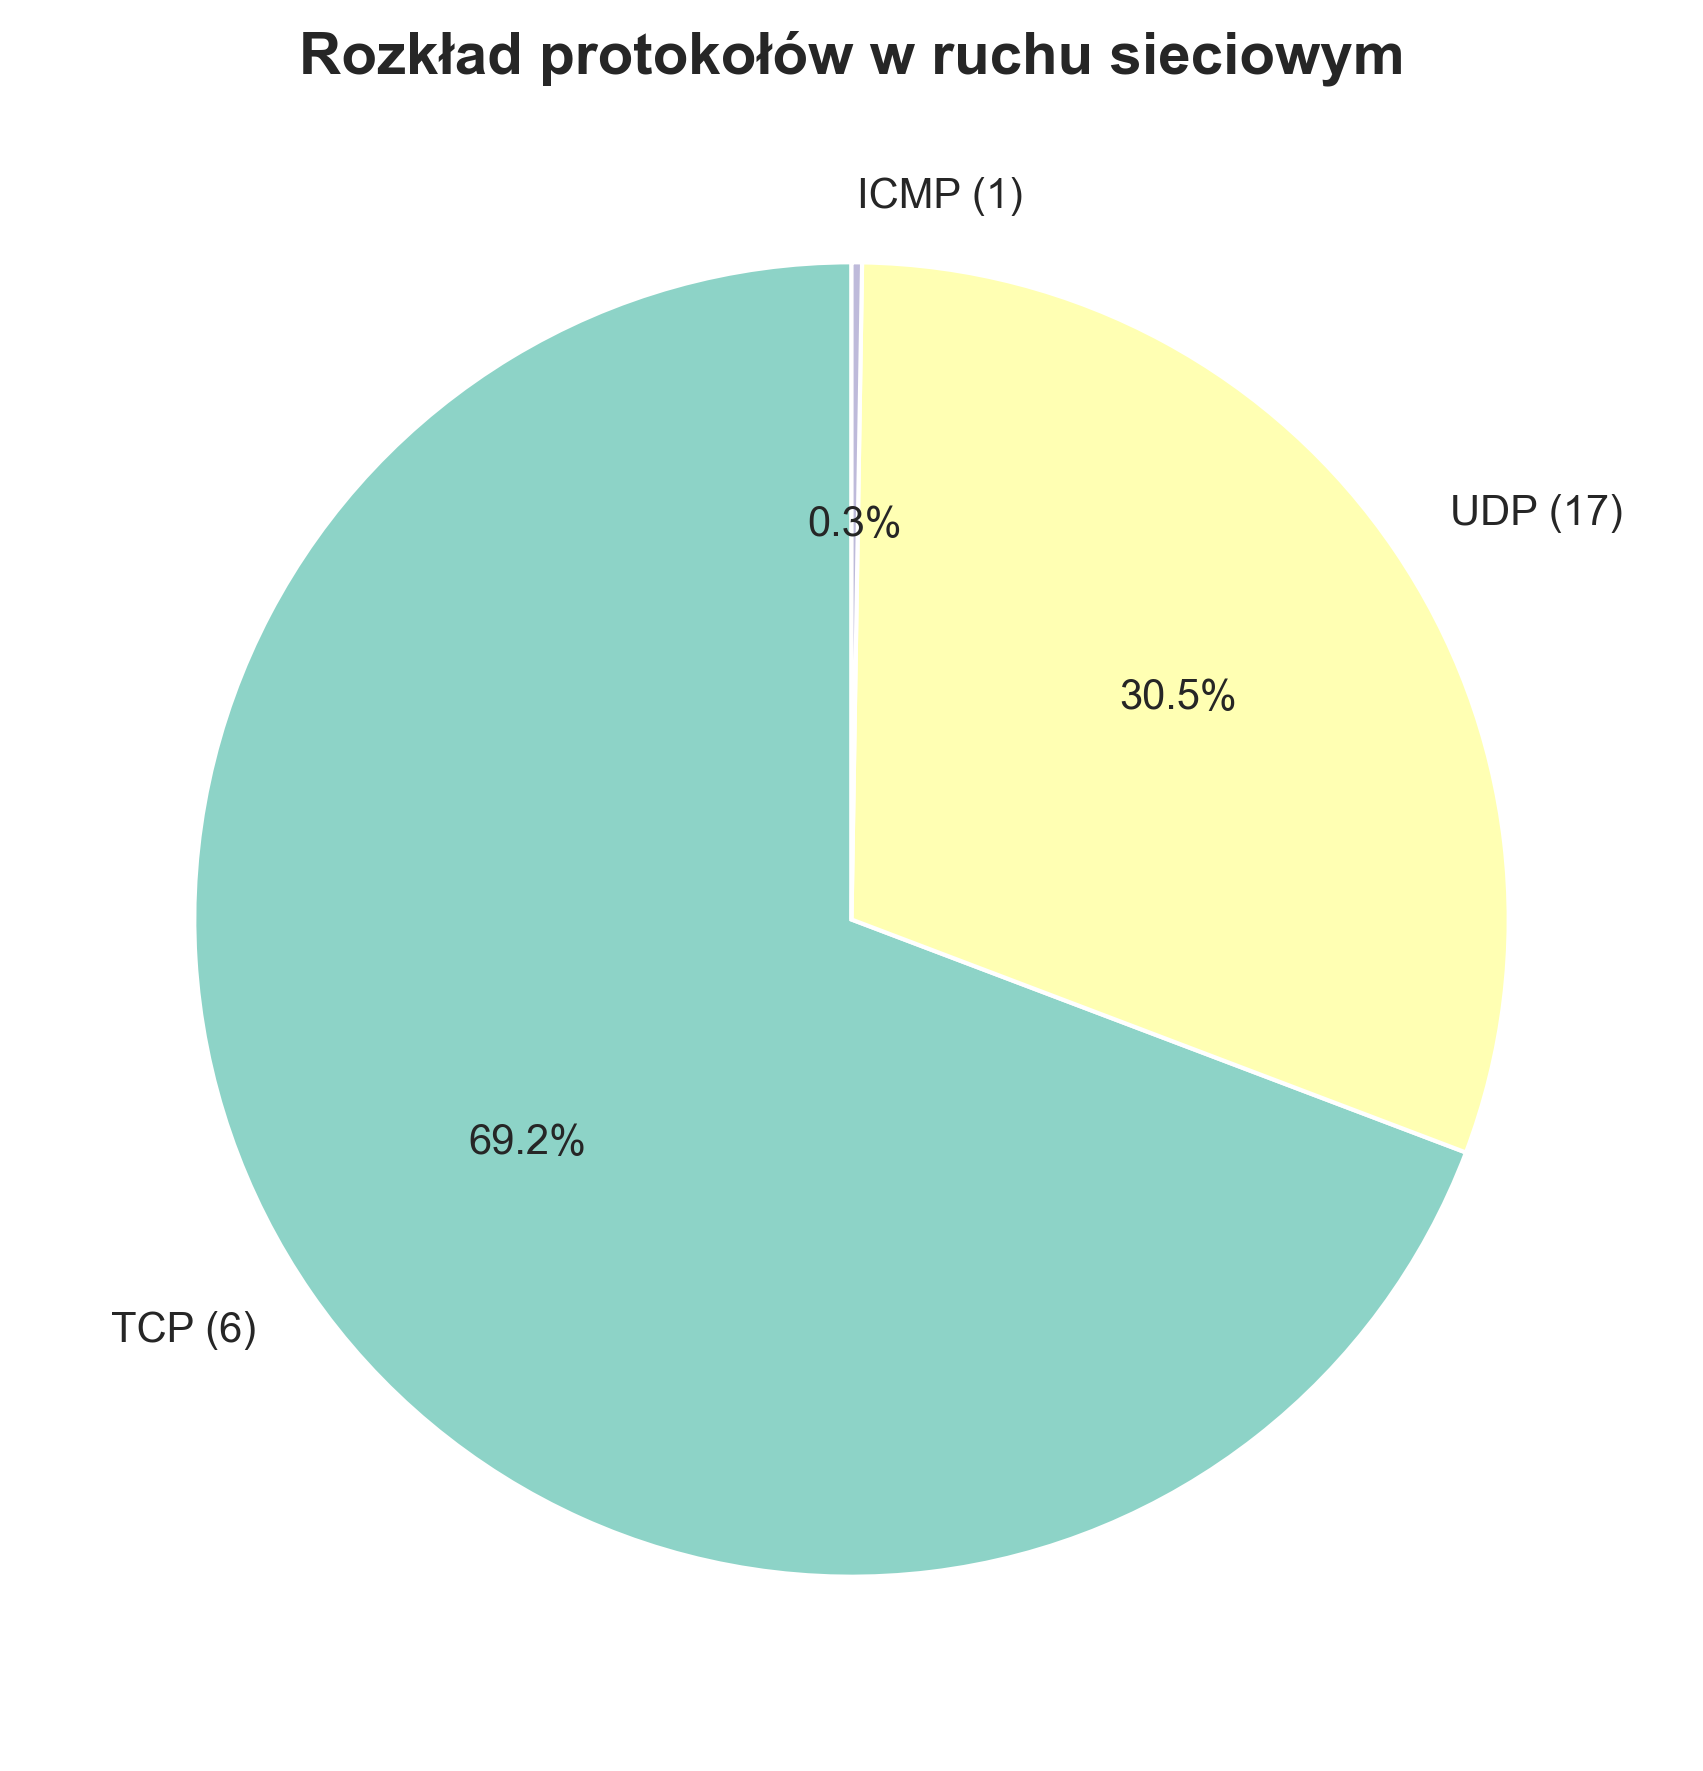

In [13]:
# Wykres rozkładu protokołów
viz_paths['protocols'] = viz.plot_protocol_distribution(flows)

# Wyświetl inline
from IPython.display import Image, display
display(Image(filename=viz_paths['protocols']))

INFO:visualizations:Wykres zapisany: ./output/visualizations\severity_distribution.png


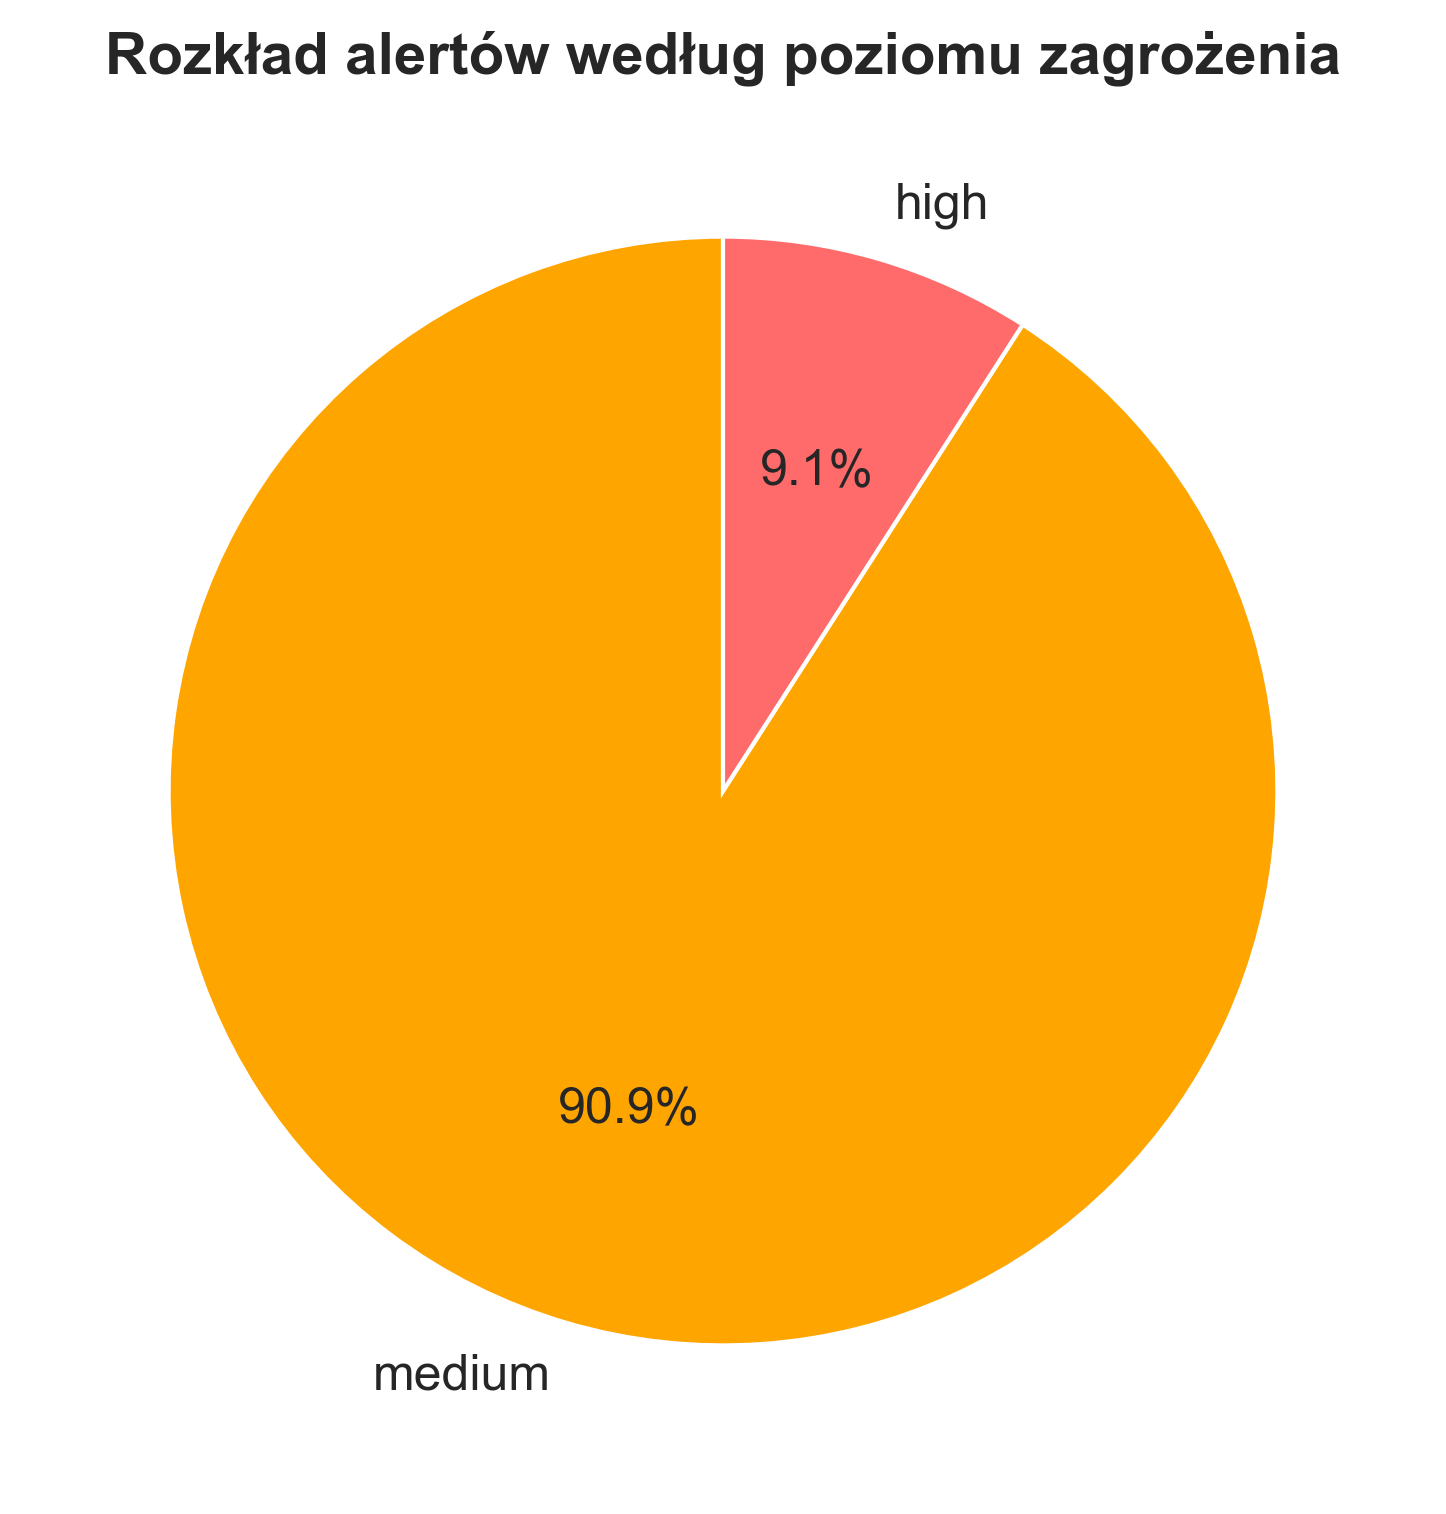

In [14]:
# Wykres alertów według severity
if not alerts_df.empty:
    viz_paths['severity'] = viz.plot_severity_distribution(alerts_df)
    display(Image(filename=viz_paths['severity']))
else:
    print("Brak alertów do wizualizacji")

INFO:visualizations:Wykres zapisany: ./output/visualizations\alerts_timeline.png


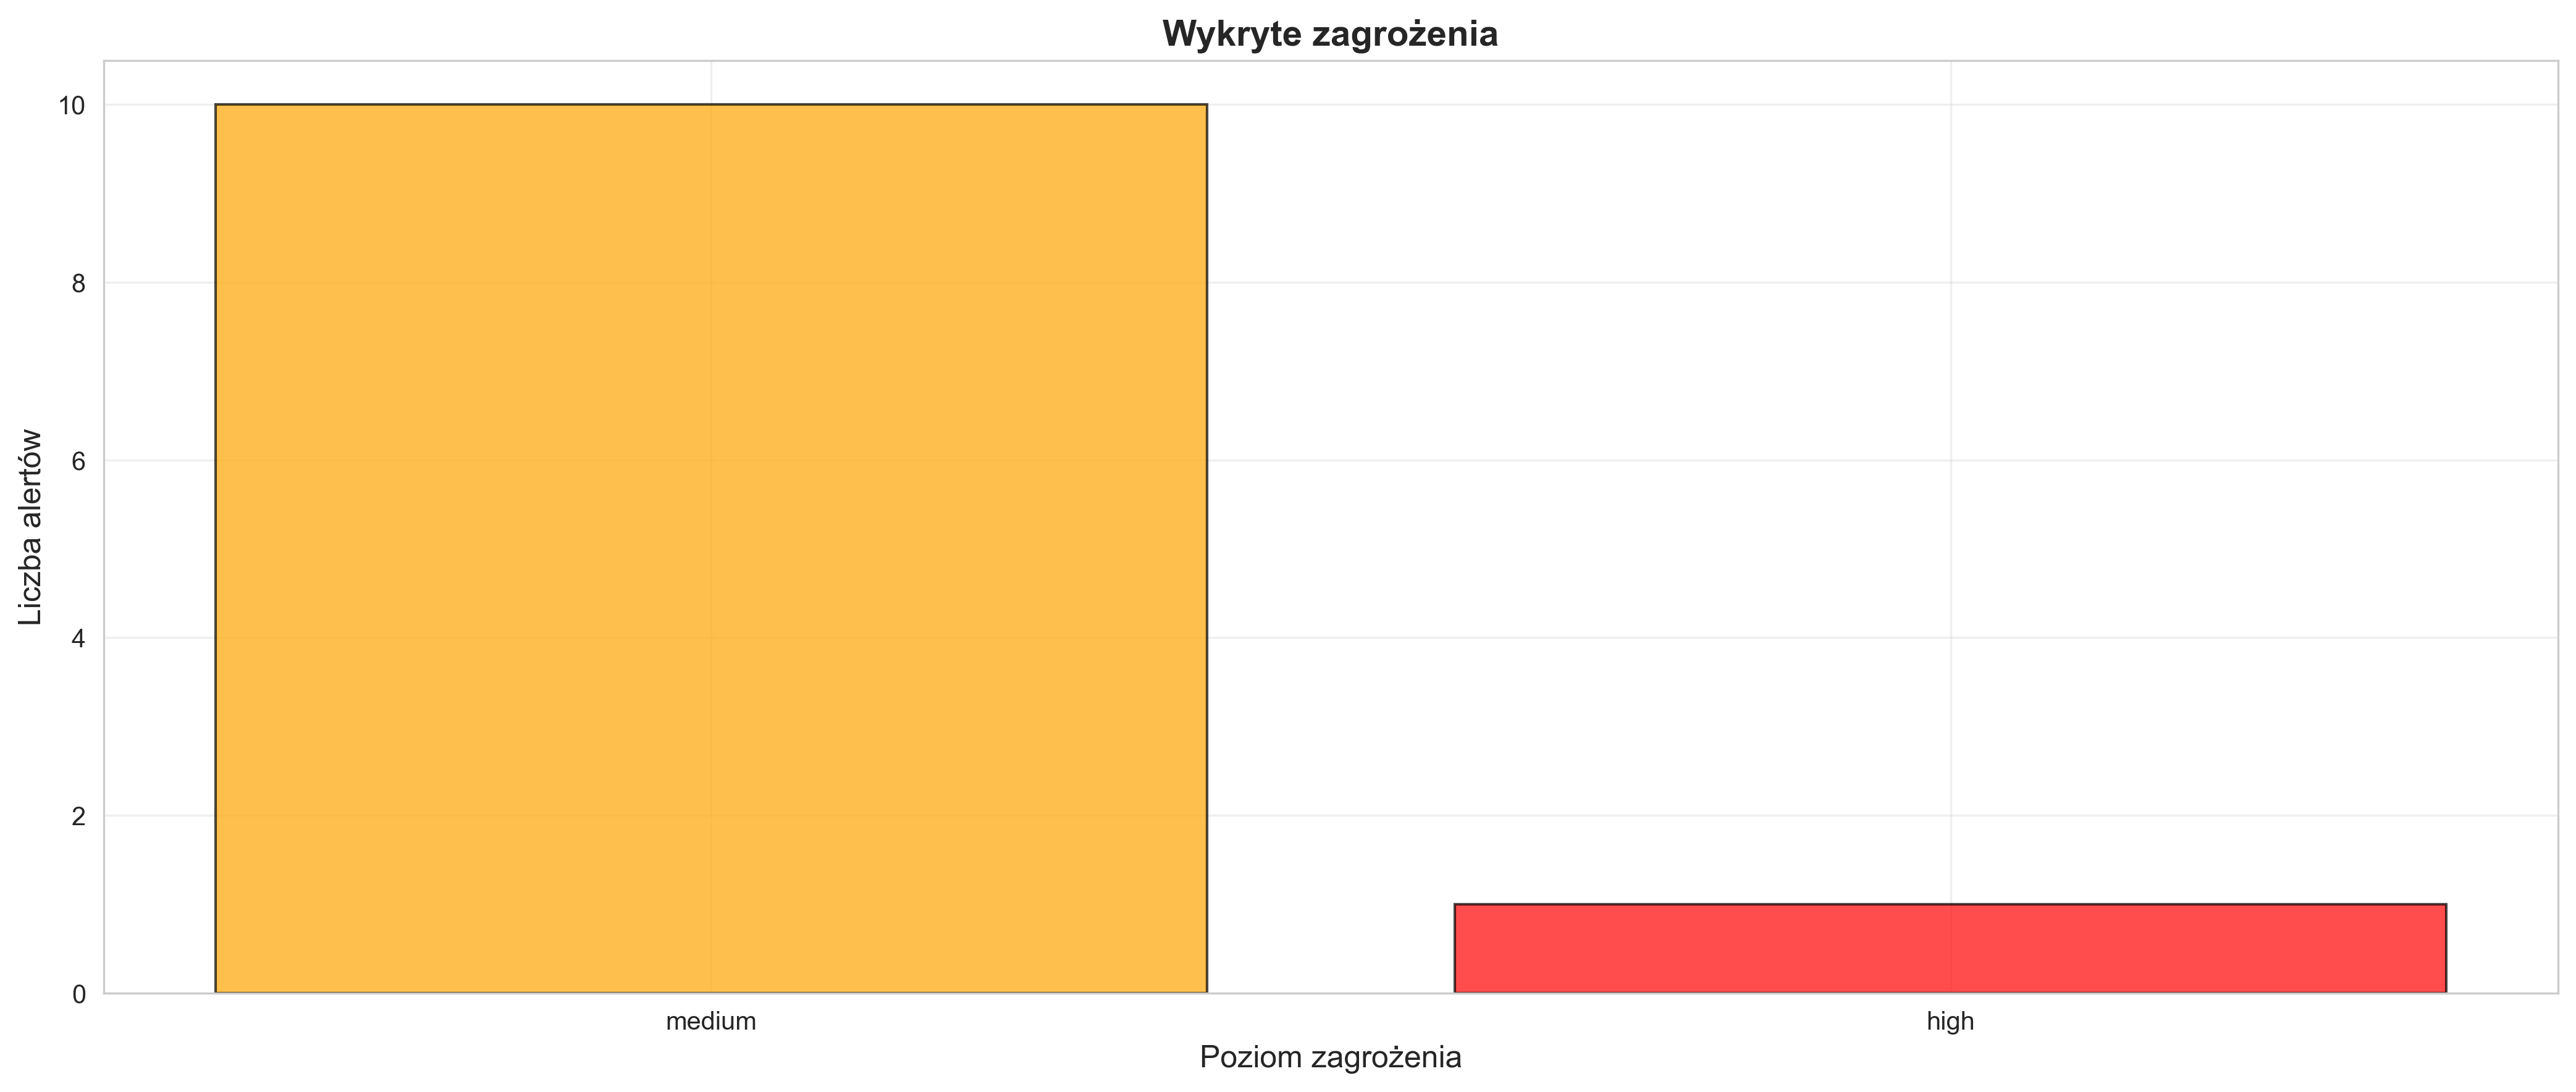

In [15]:
# Wykres alertów timeline
if not alerts_df.empty:
    viz_paths['alerts'] = viz.plot_alerts_timeline(alerts_df)
    display(Image(filename=viz_paths['alerts']))
else:
    print("Brak alertów do wizualizacji")

INFO:visualizations:Wykres zapisany: ./output/visualizations\confusion_matrix.png


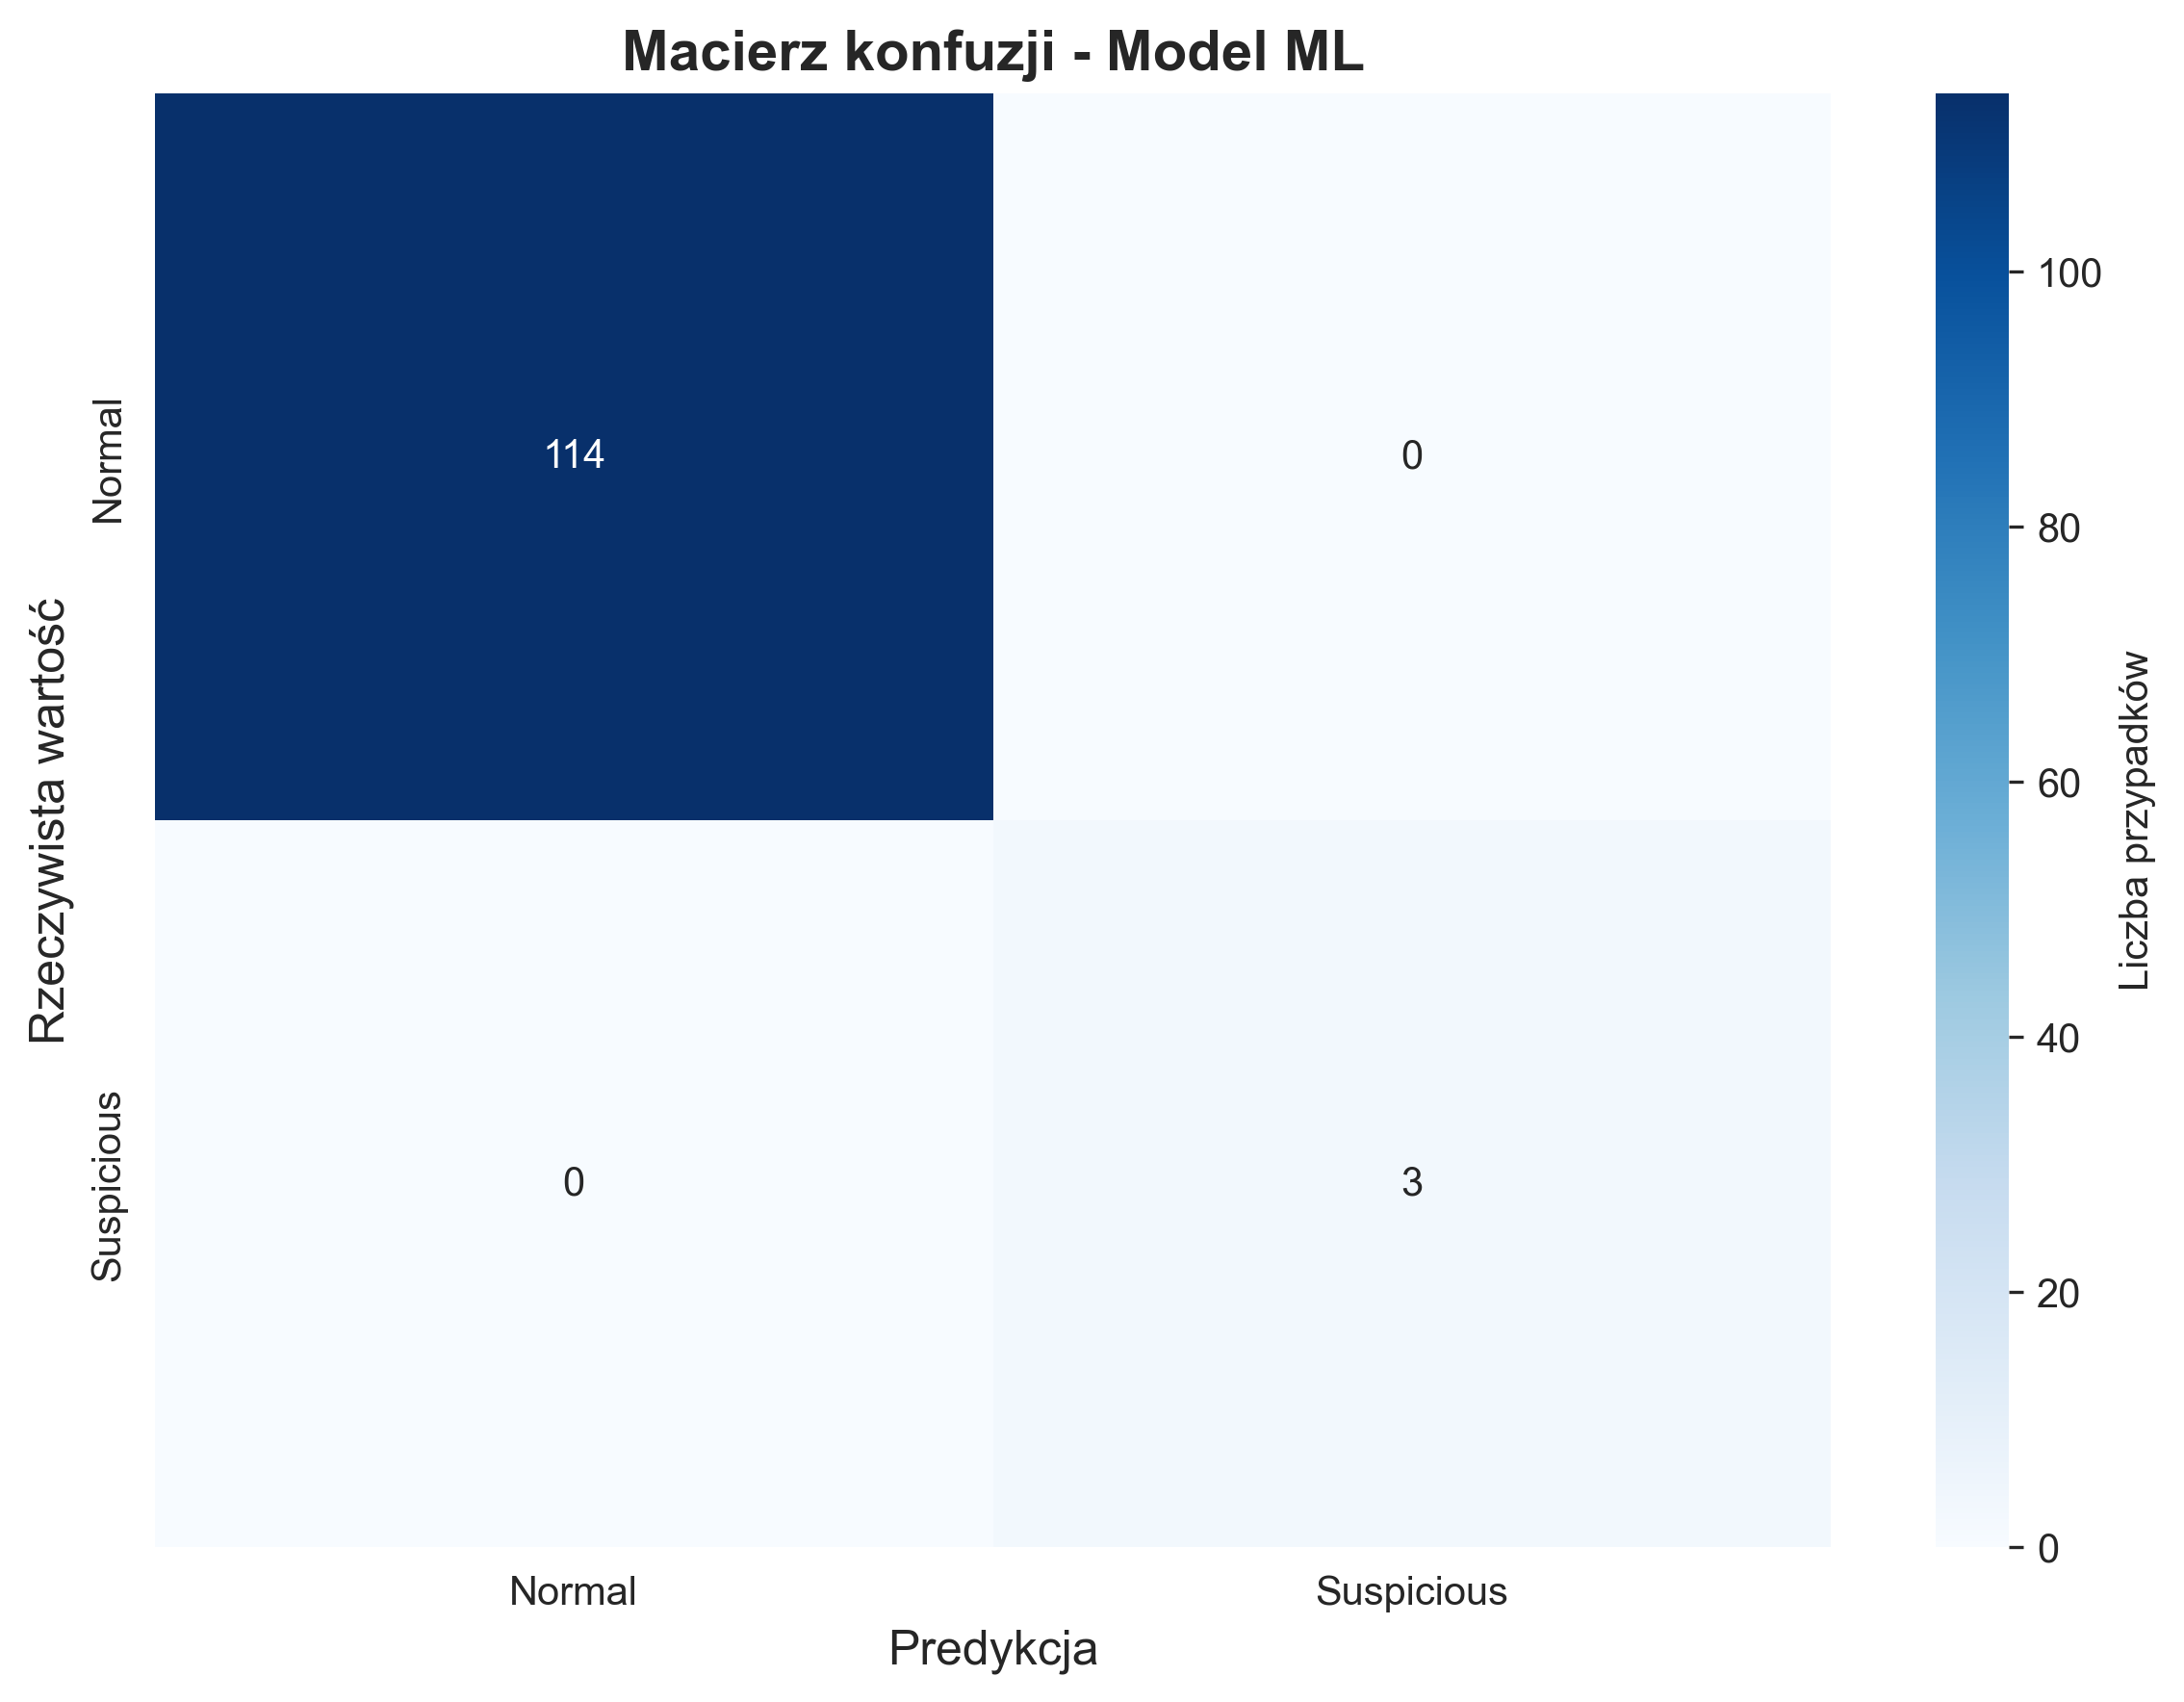

In [16]:
# Macierz konfuzji
viz_paths['confusion'] = viz.plot_confusion_matrix(ml_metrics['confusion_matrix'])
display(Image(filename=viz_paths['confusion']))

INFO:visualizations:Wykres zapisany: ./output/visualizations\top_dst_ip.png


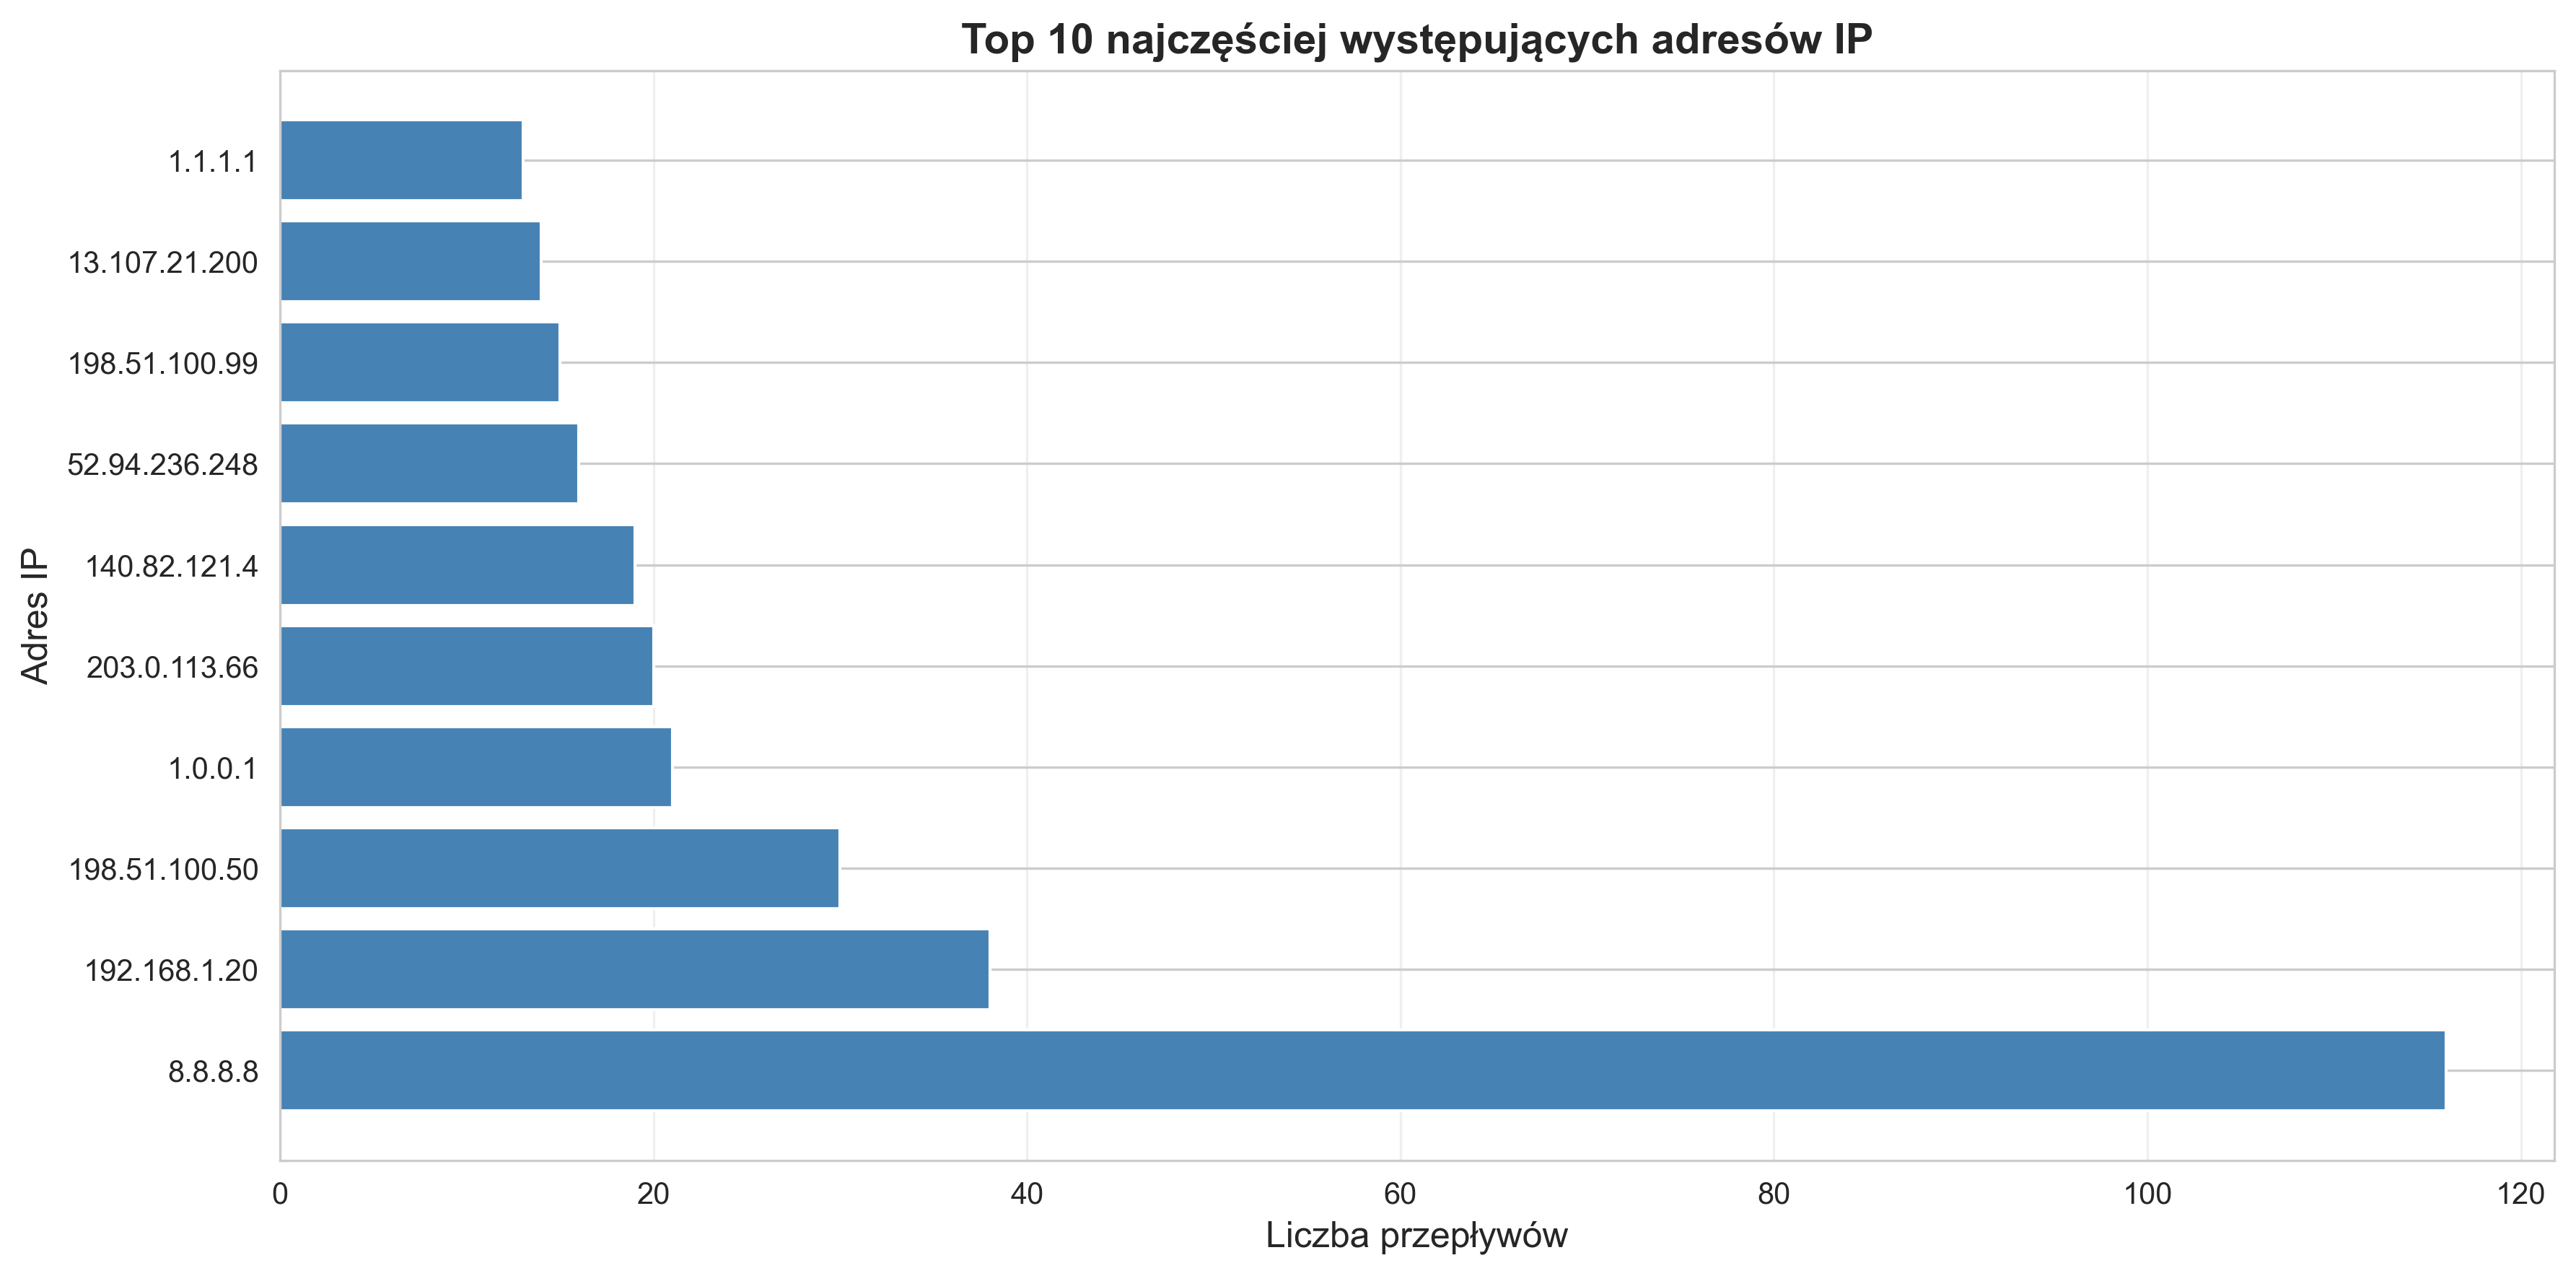

In [17]:
# Top IP
viz_paths['top_ips'] = viz.plot_top_ips(flows, ip_column='dst_ip', top_n=10)
display(Image(filename=viz_paths['top_ips']))

### Mapa Threat Intelligence

Interaktywna mapa pokazujaca polaczenia sieciowe z podzialem na normalne/podejrzane.

In [ ]:
# Mapa Threat Intelligence
map_path = viz.create_threat_intel_map(enriched_flows, alerts_df)

if map_path:
    print(f"[OK] Mapa zapisana: {map_path}")
    print("\nOtworz plik HTML w przegladarce aby zobaczyc interaktywna mape")
    
    # Proba wyswietlenia w notebook
    try:
        from IPython.display import IFrame
        display(IFrame(src=map_path, width=900, height=500))
    except:
        print(f"Otworz recznie: {os.path.abspath(map_path)}")
else:
    print("Nie udalo sie utworzyc mapy (brak danych geolokalizacyjnych lub folium)")

INFO:visualizations:Mapa Threat Intelligence zapisana: ./output/visualizations\threat_intel_map.html


✅ Mapa zapisana: ./output/visualizations\threat_intel_map.html

🔗 Otwórz plik HTML w przeglądarce aby zobaczyć interaktywną mapę


🔗 Otwórz plik HTML w przeglądarce aby zobaczyć interaktywną mapę


---
## Krok 7: Generowanie raportow

### 7a: Raport HTML

In [ ]:
from report_generator import ReportGenerator

# Generator raportow HTML
report_gen = ReportGenerator(output_dir="./output")

# Generowanie raportu
html_path = report_gen.generate_html_report(
    flows=flows,
    stats=stats,
    alerts=alerts_df if not alerts_df.empty else None,
    ml_metrics=ml_metrics,
    visualizations=viz_paths
)

print(f"[OK] Raport HTML wygenerowany: {html_path}")
print(f"\nOtworz w przegladarce: {os.path.abspath(html_path)}")

INFO:report_generator:Raport HTML wygenerowany: ./output\report_20251130_142541.html


✅ Raport HTML wygenerowany: ./output\report_20251130_142541.html

🔗 Otwórz w przeglądarce: c:\projekty\studia\network-analytic\output\report_20251130_142541.html


🔗 Otwórz w przeglądarce: c:\projekty\studia\network-analytic\output\report_20251130_142541.html


### 7b: Raport LaTeX / PDF

In [21]:
from latex_report_generator import LaTeXReportGenerator

# Generator raportow LaTeX
latex_gen = LaTeXReportGenerator(output_dir="./output")

# Generowanie raportu
tex_path = latex_gen.generate_latex_report(
    flows=flows,
    stats=stats,
    alerts=alerts_df if not alerts_df.empty else None,
    ml_metrics=ml_metrics,
    enriched_flows=enriched_flows,
    visualization_paths=viz_paths,
    title="Raport Analizy Ruchu Sieciowego",
    author="System Analizy Sieciowej",
    compile_pdf=True  # Ustaw False jesli nie masz pdflatex
)

print(f"[OK] Raport LaTeX wygenerowany: {tex_path}")

INFO:latex_report_generator:Raport LaTeX wygenerowany: ./output\report_20251130_143336.tex
INFO:latex_report_generator:Zainstaluj MiKTeX lub TeX Live aby generować PDF
INFO:latex_report_generator:Zainstaluj MiKTeX lub TeX Live aby generować PDF


[OK] Raport LaTeX wygenerowany: ./output\report_20251130_143336.tex



---
## Podsumowanie

Wszystkie kroki zakonczone! Sprawdz wygenerowane pliki:

In [ ]:
print("=" * 60)
print("WYGENEROWANE PLIKI")
print("=" * 60)

print("\ndata/")
for f in os.listdir("data"):
    size = os.path.getsize(f"data/{f}") / 1024
    print(f"   |- {f} ({size:.1f} KB)")

print("\noutput/")
for f in os.listdir("output"):
    path = f"output/{f}"
    if os.path.isdir(path):
        print(f"   |- {f}/")
        for sf in os.listdir(path):
            print(f"   |  |- {sf}")
    else:
        size = os.path.getsize(path) / 1024
        print(f"   |- {f} ({size:.1f} KB)")

print("\n" + "=" * 60)
print("[OK] WORKFLOW ZAKONCZONY POMYSLNIE!")
print("=" * 60)

---
## Spelnione wymagania projektowe

In [ ]:
requirements = {
    "A.1 - Wczytywanie PCAP (NFStream/Scapy)": "[OK]",
    "A.2 - Statystyki przeplywow": "[OK]",
    "D.1 - Reguly detekcyjne Python": "[OK]",
    "D.2 - Reguly Sigma (10 regul MITRE ATT&CK)": "[OK]",
    "ML.1 - Klasyfikacja ML": "[OK]",
    "ML.2 - Metryki FPR/TPR": "[OK]",
    "ML.3 - Trenowanie na nowych danych": "[OK]",
    "E.1 - Threat Intelligence enrichment": "[OK]",
    "V.1 - Wizualizacje alertow": "[OK]",
    "V.2 - Mapa geograficzna (nice-to-have)": "[OK]",
}

print("\n" + "=" * 50)
print("WYMAGANIA PROJEKTU")
print("=" * 50)

for req, status in requirements.items():
    print(f"{status} {req}")

print("\n" + "=" * 50)
print("Wszystkie wymagania spelnione!")
print("=" * 50)

---
## Dostepne reguly Sigma

System zawiera 10 regul Sigma zgodnych z frameworkiem MITRE ATT&CK:

In [23]:
import os
import yaml

print("=" * 70)
print("REGULY SIGMA - MITRE ATT&CK")
print("=" * 70)

sigma_rules_dir = "detection_rules/sigma_rules"
if os.path.exists(sigma_rules_dir):
    for filename in sorted(os.listdir(sigma_rules_dir)):
        if filename.endswith('.yml'):
            with open(os.path.join(sigma_rules_dir, filename), 'r', encoding='utf-8') as f:
                rule = yaml.safe_load(f)
            
            # Wyciagnij tagi MITRE
            tags = rule.get('tags', [])
            mitre_tags = [t.split('.')[-1].upper() for t in tags if t.startswith('attack.t')]
            mitre_str = ', '.join(mitre_tags) if mitre_tags else 'N/A'
            
            print(f"\n{rule.get('title', 'Unknown')}")
            print(f"   Poziom: {rule.get('level', 'N/A').upper()}")
            print(f"   MITRE:  {mitre_str}")
            print(f"   Opis:   {rule.get('description', '').split(chr(10))[0][:60]}...")
else:
    print("Katalog z regulami Sigma nie istnieje")

print("\n" + "=" * 70)
print("Wiecej informacji: detection_rules/sigma_rules/README.md")
print("=" * 70)

REGULY SIGMA - MITRE ATT&CK

Cobalt Strike C2 Beacon Detection
   Poziom: CRITICAL
   MITRE:  001, T1573
   Opis:   Detects potential Cobalt Strike beacon communication pattern...

Cryptocurrency Mining Communication
   Poziom: HIGH
   MITRE:  T1496
   Opis:   Detects network connections to common cryptocurrency mining ...

Large Data Transfer - Potential Exfiltration
   Poziom: LOW
   MITRE:  T1048, T1041
   Opis:   Detects large data transfers that may indicate data exfiltra...

DNS Tunneling Detection
   Poziom: MEDIUM
   MITRE:  004, T1048
   Opis:   Detects potential DNS tunneling based on unusual DNS traffic...

Metasploit Reverse Shell Connection
   Poziom: CRITICAL
   MITRE:  T1059
   Opis:   Detects connections to port 4444, the default port for Metas...

Network Port Scan Detection
   Poziom: MEDIUM
   MITRE:  T1046
   Opis:   Detects network port scanning activity. Port scanning is com...

RDP Brute Force Attempt Detection
   Poziom: HIGH
   MITRE:  T1110, 001
   Opis:   Det

---
## Jak dodac wlasna regule Sigma

Przyklad tworzenia nowej reguly:

In [ ]:
# Przyklad: Tworzenie wlasnej reguly Sigma
import yaml

# Definicja reguly
my_rule = {
    'title': 'Custom Backdoor Port Detection',
    'id': 'custom-rule-12345',
    'status': 'experimental',
    'description': 'Detects connections to ports commonly used by backdoors',
    'author': 'Your Name',
    'date': '2024/11/30',
    'logsource': {
        'category': 'network',
        'product': 'flow'
    },
    'detection': {
        'selection': {
            'DestinationPort': [666, 31337, 12345, 54321]  # Backdoor ports
        },
        'condition': 'selection'
    },
    'level': 'critical',
    'tags': [
        'attack.command_and_control',
        'attack.t1095'
    ],
    'falsepositives': [
        'Legitimate applications using these ports'
    ]
}

# Zapisanie reguly
rule_path = "detection_rules/sigma_rules/custom_backdoor.yml"
with open(rule_path, 'w', encoding='utf-8') as f:
    yaml.dump(my_rule, f, default_flow_style=False, allow_unicode=True)

print(f"[OK] Regula zapisana: {rule_path}")
print("\nZawartosc reguly:")
print("-" * 40)
print(yaml.dump(my_rule, default_flow_style=False))